# Do Humans Prefer Cognitive Effort Over Doing Nothing?
Takkla Younan, Markus Nyström, Sandra Lobensteijn & Alexandra Mathiesen

### Orginalstudien

Författare av orginal studien är Raymond Wu, Amanda M. Ferguson och Michael Inzlicht. 

Det är sedan tidigare känt att människor, liksom andra djur, generellt undviker både mental och fysisk ansträngning. Samtidigt tenderar vi också att undvika att inte göra någonting alls. Originalstudien undersöker därför om människor föredrar kognitiv ansträngning framför att vara helt sysslolösa.

Studien består av totalt 12 delstudier. I dessa fick deltagarna genomföra samma eller olika demand selection tasks, där de kunde välja mellan att utföra en kognitivt krävande uppgift eller att inte göra något alls. De olika uppgifterna som användes i studierna inkluderade enkel addition (add-1, add-3 och add-variety tasks), Stroop-test och symbolräkning. Efter själva uppgifterna fick deltagaren också svara på frågor angående Need for Cognition (NFC), Boredom Proneness (BPS) och Meaningfulness of Effort (MOE), för att kolla på indviduella skillnader.  

I vår analys har vi valt att fokusera på studie 2, som använder den enkla additionsuppgiften add-3.

Studie 2: ADD 3 vs. DO NOTHING - den kognitivt krävande uppgiften var att addera 3 till olika tal. 

### Vår frågeställning: 

Är deltagare mindre benägna att välja den ansträngande uppgiften ju fler trials som gått? 

- Modereras effekten av individuella skillnader som Need for Cognition och Boredom Proneness?

# Databearbetning

Vi börjar med att importera modulerna vi kommer att behöva under vår analys. 

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Vi läser in rådatan från studie 2 och undersöker kolumnerna samt raderna (några av dem olika deltagarna (PID)). Rådatan är ganska enkel att förstå tack vare att orginalstudien är väl utförd samt tydligt förklarad i rapporten. Det fanns även ett dokument med generell info och förklaring till alla förkortingar och variabler i studien.

"ADD 3" innebär att deltagaren valde att göra den kognitivt krävande uppgiften, medan "DO NOTHING" betyder att deltagen valde att inte göra något kogntivt krävande. En av dessa kommer på varje "q"-kolumn (question). Qans (answer) visar hur det gick för deltagaren beroende på valet. Om deltagaren valt "DO NOTHING" så är det blankt (pga inget resultat att dokumentera). Valde man istället "ADD 3" så visas antingen CORRECT om man räknat rätt eller INCORRECT om man räknat fel.

In [36]:
df = pd.read_csv("./Study2.csv")

df

,PID,attencheck1,q1,q1ans,q2,q2ans,q3,q3ans,q4,q4ans,...,moe_9r,moe_10r,moe_11r,moe_12r,moe_13r,moe_14r,moe_15r,moe_16r,moe_17r,moe_18r
0,1,Green,ADD 3,incorrect,DO NOTHING,,DO NOTHING,,DO NOTHING,,...,1,5,1,1,5,4,1,3,5,3
1,2,Green,DO NOTHING,,ADD 3,incorrect,DO NOTHING,,ADD 3,incorrect,...,5,3,4,5,3,4,5,4,1,3
2,3,Green,DO NOTHING,,ADD 3,incorrect,ADD 3,incorrect,ADD 3,incorrect,...,5,3,5,5,5,5,5,4,4,1
3,4,Green,DO NOTHING,,ADD 3,correct,DO NOTHING,,ADD 3,incorrect,...,5,3,4,4,3,4,4,3,3,3
4,5,Green,DO NOTHING,,DO NOTHING,,DO NOTHING,,DO NOTHING,,...,3,4,4,3,3,4,4,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,192,Green,DO NOTHING,,DO NOTHING,,DO NOTHING,,DO NOTHING,,...,3,3,4,4,3,4,4,4,1,3
192,193,Green,ADD 3,incorrect,DO NOTHING,,ADD 3,correct,DO NOTHING,,...,4,1,4,5,3,3,3,4,1,1
193,194,Green,ADD 3,incorrect,ADD 3,incorrect,ADD 3,incorrect,ADD 3,incorrect,...,4,4,4,4,3,4,4,4,3,3
194,195,Green,DO NOTHING,,ADD 3,correct,DO NOTHING,,ADD 3,incorrect,...,4,4,1,4,5,3,3,4,3,3


Vi vill få en bättre uppfattning om vad dem olika kolumnerna innehåller, vilket vi gör genom att kolla på kolumnnamnen. Vi kan med hjälp av informationen vi fått av skribenterna (generell info docs) kolla på vilka kolumner som innehåller information som är intressant för vår frågeställning och därefter börja utesluta data som är irrelevant för frågeställningen.

In [37]:
df.columns.values

array(['PID', 'attencheck1', 'q1', 'q1ans', 'q2', 'q2ans', 'q3', 'q3ans',
       'q4', 'q4ans', 'q5', 'q5ans', 'q6', 'q6ans', 'q7', 'q7ans', 'q8',
       'q8ans', 'q9', 'q9ans', 'q10', 'q10ans', 'first_deckA_mental',
       'first_deckA_boredom', 'first_deckB_mental', 'first_deckB_boredom',
       'q11', 'q11ans', 'q12', 'q12ans', 'q13', 'q13ans', 'q14', 'q14ans',
       'q15', 'q15ans', 'q16', 'q16ans', 'q17', 'q17ans', 'q18', 'q18ans',
       'q19', 'q19ans', 'q20', 'q20ans', 'second_deckA_mental',
       'second_deckA_boredom', 'second_deckB_mental',
       'second_deckB_boredom', 'q21', 'q21ans', 'q22', 'q22ans', 'q23',
       'q23ans', 'q24', 'q24ans', 'q25', 'q25ans', 'q26', 'q26ans', 'q27',
       'q27ans', 'q28', 'q28ans', 'q29', 'q29ans', 'q30', 'q30ans',
       'third_deckA_mental', 'third_deckA_boredom', 'third_deckB_mental',
       'third_deckB_boredom', 'q31', 'q31ans', 'q32', 'q32ans', 'q33',
       'q33ans', 'q34', 'q34ans', 'q35', 'q35ans', 'q36', 'q36ans', 'q37',
     

I cellen nedan har vi identifierat massa kolumner som vi väljer att ta bort. Det är egentligen samma frågor som frågas efter var 10:de trial, hur mentalt jobbigt de olika uppgifterna var samt hur tråkiga vardera var.

In [38]:
df.drop(["first_deckA_mental", "first_deckA_boredom", "first_deckB_mental", "first_deckB_boredom",
         "second_deckA_mental", "second_deckA_boredom", "second_deckB_mental", "second_deckB_boredom",
          "third_deckA_mental", "third_deckA_boredom", "third_deckB_mental", "third_deckB_boredom",
           "fourth_deckA_mental", "fourth_deckA_boredom", "fourth_deckB_mental", "fourth_deckB_boredom",
           "fifth_deckA_mental", "fifth_deckA_boredom", "fifth_deckB_mental", "fifth_deckB_boredom",
           "sixth_deckA_mental", "sixth_deckA_boredom", "sixth_deckB_mental", "sixth_deckB_boredom",
           "seventh_deckA_mental", "seventh_deckA_boredom", "seventh_deckB_mental", "seventh_deckB_boredom",
           "eigth_deckA_mental", "eigth_deckA_boredom", "eigth_deckB_mental", "eigth_deckB_boredom"],
           axis=1, inplace=True)

I nästa cell tar vi bort några frågor som ställts till deltagarna. 'Moe' står för Meaningfulness of Effort, vilket inte är något vi kollar på i denna analys. Vi behåller dock  "nfc"-kolumnerna (Need for Cognition) där deltagaren fått svara på frågor om hur de hanterar och vad de tycker om kognitivt krävande uppgifter på en skala från 1-5, samt "bps"-kolumnerna (Boredom Proneness), där deltagarna fått svara på frågor om deras egna benägenhet till uttråkning på en skala från 1-7. 

In [39]:
df.drop(["moe_1r", "moe_2r", "moe_3r", "moe_4r", "moe_5r", "moe_6r", "moe_7r", 
         "moe_8r", "moe_9r", "moe_10r", "moe_11r", "moe_12r", "moe_13r", "moe_14r",
         "moe_15r", "moe_16r", "moe_17r", "moe_18r"], axis=1, inplace=True)

Eftersom vi vill undersöka valet av uppgift tar vi även bort alla svar på ADD 3-uppgiften. Ifall någon räkna fel eller inte på uppgiften spelar alltså ingen roll.

In [40]:
df.drop(['q1ans', 'q2ans','q3ans', 'q4ans', 'q5ans', 'q6ans', 'q7ans','q8ans', 'q9ans', 'q10ans', 'q11ans',
            'q12ans', 'q13ans','q14ans','q15ans','q16ans', 'q17ans','q18ans','q19ans','q20ans','q21ans','q22ans',
            'q23ans', 'q24ans','q25ans', 'q26ans','q27ans', 'q28ans','q29ans','q30ans','q31ans', 'q32ans','q33ans',
            'q34ans','q35ans','q36ans','q37ans','q38ans','q39ans','q40ans', 'q41ans', 'q42ans','q43ans', 'q44ans',
            'q45ans', 'q46ans', 'q47ans','q48ans', 'q49ans', 'q50ans', 'q51ans','q52ans', 'q53ans','q54ans','q55ans',
            'q56ans', 'q57ans','q58ans','q59ans','q60ans','q61ans','q62ans','q63ans', 'q64ans','q65ans', 'q66ans',
            'q67ans', 'q68ans','q69ans','q70ans','q71ans', 'q72ans','q73ans','q74ans','q75ans','q76ans','q77ans',
            'q78ans','q79ans','q80ans', ], axis=1, inplace=True)

Vi har nu tagit bort alla kolumner som är irrelevanta för vår frågeställning och som vi inte behöver göra något annat med. 

I studien valde forskarna att exkludera deltagare som inte varit fokuserade på experimentet genom att göra så kallade "attention checks". Har deltagaren svarat fel på dessa frågor ("attencheck1" och "attencheck2") exkluderas dem. Under kolumnen "selfadmit" har deltagarna själva fått erkänna om de ej varit fokuserade. 

Vår frågesställning utgår från medvetna val, och därmed tar även vi bort alla deltagare som inte var fokuserade på studien i de kommande cellerna.

In [41]:
df["attencheck1"].value_counts()

attencheck1
Green     176
Yellow     20
Name: count, dtype: int64

"Yellow" var fel svar på frågan. Yellow = ej fokuserad och därmed tar vi bort alla de raderna (deltagarna).   

In [42]:
df = df.drop(df[df["attencheck1"] == "Yellow"].index)

In [43]:
df["attencheck1"].value_counts()

attencheck1
Green    176
Name: count, dtype: int64

In [44]:
df["attencheck2"].value_counts()

attencheck2
Blue    176
Name: count, dtype: int64

"Green" var fel svar på frågan. Det fanns inga rader med "Green" därmed behöver vi inte ta bort några rader.  

In [45]:
df["selfadmit"].value_counts()

selfadmit
No     92
Yes    84
Name: count, dtype: int64

"Yes" innebär att deltagaren inte var fokuserad, därmed tar vi bort alla rader med "Yes". 

In [46]:
df = df.drop(df[df["selfadmit"] == "Yes"].index)

In [47]:
df["selfadmit"].value_counts()

selfadmit
No    92
Name: count, dtype: int64

Efter rensningen av deltagare som ej varit fokuserade tar vi bort kolumnerna, eftersom de inte längre behövs för vår frågeställning. 

In [48]:
df.drop(["attencheck1", "selfadmit", "attencheck2"], axis=1, inplace=True)

In [49]:
df.columns.values

array(['PID', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10',
       'q11', 'q12', 'q13', 'q14', 'q15', 'q16', 'q17', 'q18', 'q19',
       'q20', 'q21', 'q22', 'q23', 'q24', 'q25', 'q26', 'q27', 'q28',
       'q29', 'q30', 'q31', 'q32', 'q33', 'q34', 'q35', 'q36', 'q37',
       'q38', 'q39', 'q40', 'q41', 'q42', 'q43', 'q44', 'q45', 'q46',
       'q47', 'q48', 'q49', 'q50', 'q51', 'q52', 'q53', 'q54', 'q55',
       'q56', 'q57', 'q58', 'q59', 'q60', 'q61', 'q62', 'q63', 'q64',
       'q65', 'q66', 'q67', 'q68', 'q69', 'q70', 'q71', 'q72', 'q73',
       'q74', 'q75', 'q76', 'q77', 'q78', 'q79', 'q80', 'nfc_1r',
       'nfc_2r', 'nfc_3r', 'nfc_4r', 'nfc_5r', 'nfc_6r', 'nfc_7r',
       'nfc_8r', 'nfc_9r', 'nfc_10r', 'nfc_11r', 'nfc_12r', 'nfc_13r',
       'nfc_14r', 'nfc_15r', 'nfc_16r', 'nfc_17r', 'nfc_18r', 'bps_1r',
       'bps_2r', 'bps_3r', 'bps_4r', 'bps_5r', 'bps_6r', 'bps_7r',
       'bps_8r'], dtype=object)

Efter all rensning har vi endast 92 deltagare kvar. Dessa 92 deltagare har dock fortfarande ett deltagarnummer ("PID") som är en siffra mellan 1-196. Vi återsäller därför deltagarnas nummer (PID) så att tabellen blir tydligare att läsa av. 

In [50]:
df['PID'] = range(1, len(df) + 1)

Då vi även vill undersöka individuella skillnader (Need for Cognition och Boredom Proneness) vill vi skapa två separata dataframes med dessa värden. Först NFC-medelvärdet för varje deltagare, och sedan BPS-medelvärdet för varje deltagare. NFC-koden och BPS koden ska köras separat och kommenteras sedan ut efter att DataFrame:sen har skapats. 

### NFC-kod

NFC-poängen räknas från 1-5, där högt poäng innebär högre Need for Cognition. 

Vi börjar med att ta bort kolumnerna som vi inte vill ha med i NFC-dataframet och sparar ned det, för att sedan kunna kommentera ut drop-funktionen och endast behöva läsa in csv-filen. 

Vi räknar sedan medelvärdet för Need of Cognition-poängen för varje deltagare och avrundar till två decimaler. Vi skapar en ny kolumn för medelvärden (nfc_mean). Sedan kan vi ta bort alla enskilda nfc_Nr-kolumner så att vi bara har 'PID' och 'nfc_mean'. 

In [51]:
"""nfc = df.drop(['q1', 'q2','q3', 'q4', 'q5', 'q6', 'q7','q8', 'q9', 'q10', 'q11',
            'q12', 'q13','q14','q15','q16', 'q17','q18','q19','q20','q21','q22',
            'q23', 'q24','q25', 'q26','q27', 'q28','q29','q30','q31', 'q32','q33',
            'q34','q35','q36','q37','q38','q39','q40','q41', 'q42','q43', 'q44', 'q45',
            'q46', 'q47','q48', 'q49', 'q50', 'q51','q52', 'q53','q54','q55','q56',
            'q57','q58','q59','q60','q61','q62','q63', 'q64','q65', 'q66','q67',
            'q68','q69','q70','q71', 'q72','q73','q74','q75','q76','q77','q78','q79','q80','bps_1r',
            'bps_2r', 'bps_3r', 'bps_4r', 'bps_5r', 'bps_6r', 'bps_7r', 'bps_8r'], axis=1, inplace=True)

nfc = df.to_csv('Study2_nfc.csv', index= False)"""

nfc = pd.read_csv("./Study2_nfc.csv")

nfc["nfc_mean"] = nfc.drop(columns=["PID"]).mean(axis=1).round(2)

nfc.drop(["nfc_1r", "nfc_2r", "nfc_3r", "nfc_4r", "nfc_5r", "nfc_6r","nfc_7r", "nfc_8r",
         "nfc_9r", "nfc_10r", "nfc_11r", "nfc_12r", "nfc_13r", "nfc_14r", "nfc_15r", "nfc_16r",
          "nfc_17r", "nfc_18r" ], axis=1, inplace=True)

nfc



,PID,nfc_mean
0,1,3.67
1,2,3.00
2,3,3.06
3,4,3.17
4,5,3.28
...,...,...
87,88,4.06
88,89,3.56
89,90,2.72
90,91,2.94


### BPS-kod

BPS-poängen räknas från 1-7, där högt poäng innebär högre Boredom Proneness. 

Likt stegen för NFC-filen börjar med att ta bort kolumnerna som vi inte vill ha med i dataframet och sparar ned det, för att sedan kunna kommentera ut drop-funktionen och endast behöva läsa in csv-filen. 

Vi räknar sedan medelvärdet för Boredom Proneness-poängen för varje deltagare och avrundar till två decimaler. Vi skapar en ny kolumn för medelvärden (bps_mean). Sedan kan vi ta bort alla enskilda bps_Nr-kolumner så att vi bara har 'PID' och 'bps_mean'. 

In [52]:
"""bps = df.drop(['q1', 'q2','q3', 'q4', 'q5', 'q6', 'q7','q8', 'q9', 'q10', 'q11',
            'q12', 'q13','q14','q15','q16', 'q17','q18','q19','q20','q21','q22',
            'q23', 'q24','q25', 'q26','q27', 'q28','q29','q30','q31', 'q32','q33',
            'q34','q35','q36','q37','q38','q39','q40','q41', 'q42','q43', 'q44', 'q45',
            'q46', 'q47','q48', 'q49', 'q50', 'q51','q52', 'q53','q54','q55','q56',
            'q57','q58','q59','q60','q61','q62','q63', 'q64','q65', 'q66','q67',
            'q68','q69','q70','q71', 'q72','q73','q74','q75','q76','q77','q78','q79','q80', 
            "nfc_1r", "nfc_2r", "nfc_3r", "nfc_4r", "nfc_5r", "nfc_6r","nfc_7r", "nfc_8r",
            "nfc_9r", "nfc_10r", "nfc_11r", "nfc_12r", "nfc_13r", "nfc_14r", "nfc_15r", "nfc_16r",
            "nfc_17r", "nfc_18r" ], axis=1, inplace=True)

bps = df.to_csv('Study2_bps.csv', index= False)"""

bps = pd.read_csv("./Study2_bps.csv")

bps["bps_mean"] = bps.drop(columns=["PID"]).mean(axis=1).round(2)

bps.drop(["bps_1r", "bps_2r", "bps_3r", "bps_4r", 
          "bps_5r", "bps_6r", "bps_7r", "bps_8r" ], axis=1, inplace=True)

bps

,PID,bps_mean
0,1,3.88
1,2,3.12
2,3,5.25
3,4,6.38
4,5,5.62
...,...,...
87,88,4.38
88,89,4.75
89,90,5.12
90,91,2.88


# Databearbetning forts.

Innan vi sätter ihop nfc_mean och bps_mean med huvuddatan (df) vill vi merga de två tillsammans. 

In [53]:
nfc_bps = pd.merge(nfc, bps[["PID", "bps_mean"]], on="PID", how="left")

nfc_bps

,PID,nfc_mean,bps_mean
0,1,3.67,3.88
1,2,3.00,3.12
2,3,3.06,5.25
3,4,3.17,6.38
4,5,3.28,5.62
...,...,...,...
87,88,4.06,4.38
88,89,3.56,4.75
89,90,2.72,5.12
90,91,2.94,2.88


Efter att vi har skapat två separata dataframes för nfc- och bps-poängen tar vi bort kolumnerna från vår ursprungliga data.  

In [54]:
df.drop(["nfc_1r", "nfc_2r", "nfc_3r", "nfc_4r", "nfc_5r", "nfc_6r","nfc_7r", "nfc_8r",
         "nfc_9r", "nfc_10r", "nfc_11r", "nfc_12r", "nfc_13r", "nfc_14r", "nfc_15r", "nfc_16r",
          "nfc_17r", "nfc_18r", "bps_1r", "bps_2r", "bps_3r", "bps_4r", 
          "bps_5r", "bps_6r", "bps_7r", "bps_8r"], axis=1, inplace=True)

Nu omvandlar vi datan från bred till lång data eftersom det är bättre för dataanalys då lång data är enklare för program att läsa av. Nu får vi istället 7360 rader totalt då det är 80 traials per deltagare och det är 92 deltagare totalt. 

In [55]:
df_long = df.melt(
    id_vars='PID',
    var_name='trial',
    value_name='task'
)

df_long

,PID,trial,task
0,1,q1,DO NOTHING
1,2,q1,DO NOTHING
2,3,q1,DO NOTHING
3,4,q1,DO NOTHING
4,5,q1,DO NOTHING
...,...,...,...
7355,88,q80,DO NOTHING
7356,89,q80,ADD 3
7357,90,q80,DO NOTHING
7358,91,q80,DO NOTHING


Vi omvandlar "ADD 3" till 1 och "DO NOTHING" till 0 för att kunna räkna på det. Vi vill inte ha strängar i raderna. 

Vi tar även bort bokstaven 'q' i "trial" och omvandlar kolumnen till numerisk istället för sträng.

In [56]:
df_long['task'] = df_long['task'].replace({
    'DO NOTHING': 0,
    'ADD 3': 1})

df_long['trial'] = df_long['trial'].str.replace('q', '', regex=False)

df_long['trial'] = pd.to_numeric(df_long['trial'])

/var/folders/tg/ftqsn3ks7gz6whtkpknm62m40000gn/T/ipykernel_72136/1553643936.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_long['task'] = df_long['task'].replace({


För läsbarhetens skull vill vi att strukturen på den långa datan ska vara 'radvis' per deltagare. (Alltså att de första raderna är endast deltagare X och dess trials, därefter deltagare Y...). Vi först efter 'PID' och sedan efter 'trial' inom varje PID

In [57]:
df_long = df_long.sort_values(['PID', 'trial']).reset_index(drop=True)

Nu mergar vi de två dataframesen till endast en, vilket är vår slutgiltiga, renad data. 

In [58]:
df_merged = pd.merge(df_long, nfc_bps[["PID", "nfc_mean", "bps_mean"]], on="PID", how="left")

df_merged

,PID,trial,task,nfc_mean,bps_mean
0,1,1,0,3.67,3.88
1,1,2,1,3.67,3.88
2,1,3,0,3.67,3.88
3,1,4,1,3.67,3.88
4,1,5,1,3.67,3.88
...,...,...,...,...,...
7355,92,76,0,3.56,2.50
7356,92,77,0,3.56,2.50
7357,92,78,0,3.56,2.50
7358,92,79,1,3.56,2.50


In [59]:
df_merged.to_csv('df_merge.csv', index=False)

# ANALYS

Är deltagare mindre benägna att välja den ansträngande uppgiften ju fler trials som gått? Alltså, minskar sannolikheten att välja “ADD 3” (ansträngande) över tid (trial 1 → trial 80)?

För att undersöka frågeställningen börjar vi med att gruppera alla rader i df_merged efter trial och sedan tar medelvärdet av task för varje trial. Eftersom ADD 3 = 1 och DO NOTHING = 0 blir medelvärdet andelen deltagare som valde ADD 3, den ansträngande uppgiften. 

Vi visualiserar detta i en graf med seaborn där x är trialnummer (1-80) och y är andelen ADD 3 på varje trial, samt ritar en regressionslinje.

Vi beräknar sedan lutningen på linjen (riktningskoefficienten).

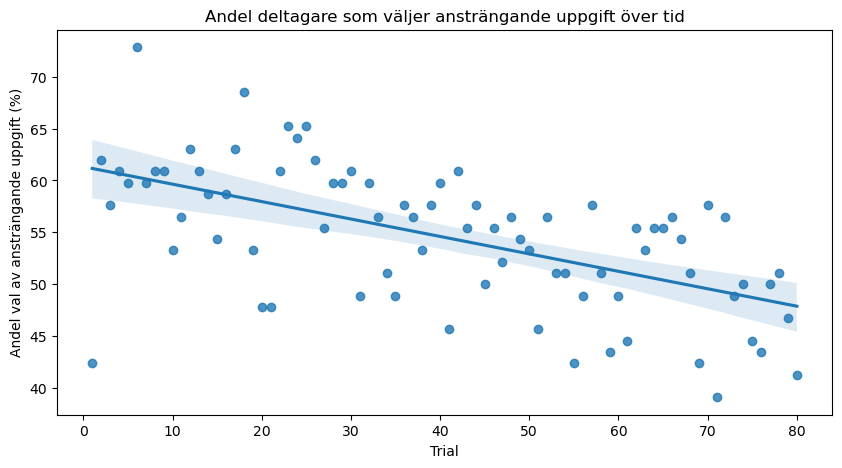

Riktningskoefficienten (k): -0.0016784636865814606
Skärningspunkten med y-axeln (m): 0.6132223445239404


In [60]:
mean_per_trial = df_merged.groupby("trial")["task"].mean()

plt.figure(figsize=(10, 5))
sns.regplot(data=mean_per_trial, 
            x = mean_per_trial.index, 
            y = mean_per_trial.values * 100)
plt.xlabel("Trial")
plt.ylabel("Andel val av ansträngande uppgift (%)")
plt.title("Andel deltagare som väljer ansträngande uppgift över tid")
plt.show()

k, m = np.polyfit(mean_per_trial.index, mean_per_trial.values, 1)

print('Riktningskoefficienten (k):', k)
print('Skärningspunkten med y-axeln (m):', m)



**Figur 1.** Figuren visar den genomsnittliga andelen deltagare som väljer den ansträngande uppgiften (ADD 3) vid varje trial (1–80). Punkterna representerar medelvärden över samtliga deltagare, och linjen visar den linjära trenden över tid. Lutningen är svagt negativ.

Analysen visade en negativ lutning (k = -0,00168), vilket innebär att andelen deltagare som valde den ansträngande uppgiften minskade med cirka 0,17 procentenheter per trial. Detta tyder på att deltagarna gradvis blev mindre benägna att välja den kognitivt krävande uppgiften ju längre experimentet pågick. Minskningen skedde dock långsamt.

# Individuella skillnader

Modereras effekten av individuella skillnader som *Need for Cognition* och *Boredom Proneness*?

### Need for Cognition

Vi börjar med att undersöka om Need for Cognition har någon påverkan på benägenheten att välja den ansträngande uppgiften över tid. Det gör vi genom att först separera de som har hög NFC från låg NFC genom att dela upp dem i två grupper. Som definition har vi att deltagare vars NFC-värde är över medianen räknas till gruppen med hög NFC, och de med ett NFC-värde under medianen(< 3.14) räknas till gruppen med låg NFC.

In [61]:
median_nfc = df_merged["nfc_mean"].median()

print('Median för nfc: ', (df_merged["nfc_mean"].median()))

df_merged["nfc_group"] = None

for i in range(len(df_merged)):
    if df_merged.loc[i, "nfc_mean"] < median_nfc:
        df_merged.loc[i, "nfc_group"] = "Låg NFC"
    else:
        df_merged.loc[i, "nfc_group"] = "Hög NFC"

df_merged

Median för nfc:  3.1399999999999997


,PID,trial,task,nfc_mean,bps_mean,nfc_group
0,1,1,0,3.67,3.88,Hög NFC
1,1,2,1,3.67,3.88,Hög NFC
2,1,3,0,3.67,3.88,Hög NFC
3,1,4,1,3.67,3.88,Hög NFC
4,1,5,1,3.67,3.88,Hög NFC
...,...,...,...,...,...,...
7355,92,76,0,3.56,2.50,Hög NFC
7356,92,77,0,3.56,2.50,Hög NFC
7357,92,78,0,3.56,2.50,Hög NFC
7358,92,79,1,3.56,2.50,Hög NFC


Därefter grupperar vi datan i df-merged efter trial samt nfc_group och tar medelvärdet av task inom varje grupp. Medelvärdet är alltså andelen deltagare som valde den ansträngande uppgiften i varje trial inom varje nfc-grupp. Här skapade vi dessutom en ny kolumn ("task_percent") för att kunna visa y-axeln i procent.

Vi skapar utifrån detta en figur där grupperna Hög och Låg NFC syns i olika färger, och där x-axeln motsvarar trialnummer (1-80) och y-axeln andelen ADD 3 på varje trial. Vi ritar även en regressionslinje per nfc-grupp.

Slutligen beräknar vi riktningskoefficienten, dvs. lutningen på linjerna.

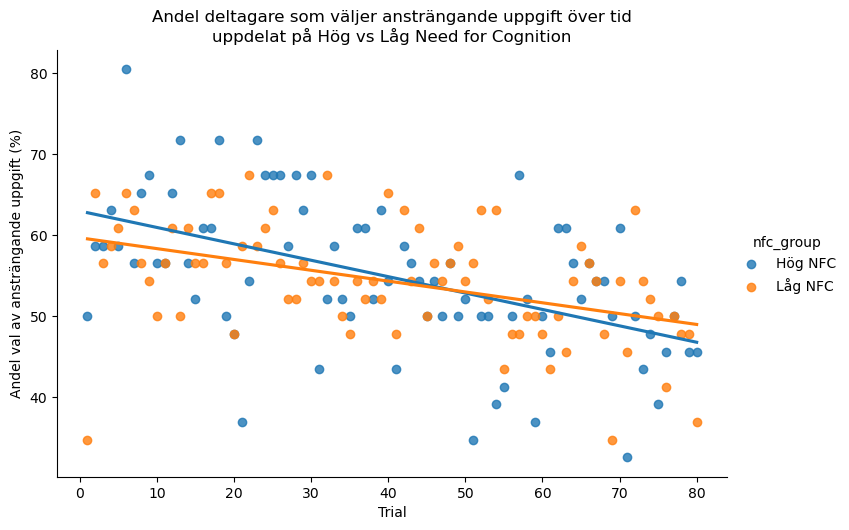

Hög NFC : Riktningskoefficient (k) = -0.00202 , Skärningspunkt (m) = 0.6297
Låg NFC : Riktningskoefficient (k) = -0.00134 , Skärningspunkt (m) = 0.5967


In [62]:
nfc_mean_per_trial_group = (df_merged.groupby(["trial", "nfc_group"])["task"].mean().reset_index())

nfc_mean_per_trial_group["task_percent"] = nfc_mean_per_trial_group["task"] * 100

sns.lmplot(
    data=nfc_mean_per_trial_group,
    x="trial",
    y="task_percent",
    ci=None,
    hue="nfc_group",
    height=5,
    aspect=1.5,
)

plt.xlabel("Trial")
plt.ylabel("Andel val av ansträngande uppgift (%)")
plt.title("Andel deltagare som väljer ansträngande uppgift över tid\nuppdelat på Hög vs Låg Need for Cognition")
plt.show()

for group, subset in nfc_mean_per_trial_group.groupby("nfc_group"):
    k, m = np.polyfit(subset["trial"], subset["task"], 1)
    print(group, ": Riktningskoefficient (k) =", k.round(5), ", Skärningspunkt (m) =", m.round(4))

**Figur 2.** Andel deltagare som valde den ansträngande uppgiften över tid, uppdelat på hög och låg Need for Cognition. Linjerna visar linjära trendlinjer för respektive grupp.

Figur 2 visar andelen deltagare som valde den ansträngande uppgiften (”ADD 3”) över tid (1-80 trials), uppdelat efter hög respektive låg Need for Cognition (NFC). Båda grupperna visar en minskning i andelen val av den ansträngande uppgiften över tid, vilket vi kan se på respektive grupps negativa riktningskoefficienter. Detta innebär att deltagarna generellt tenderar att välja den enklare uppgiften istället för den ansträngande ju längre experimentet pågår.

Lutningarna (Hög NFC = −0.00202 vs Låg NFC = −0.00134) är båda svagt negativa, vilket innebär att minskningen sker långsamt. Skillnaden i lutning är dessutom liten. Gruppen med hög NFC ligger dock något högre i genomsnitt (m = 0.6297 ≈ 63%) jämfört med gruppen med låg NFC (m = 0.5967 ≈ 60%), vilket tyder på att personer med hög Need for Cognition i större utsträckning väljer den ansträngande uppgiften (initialt).

Efter ca 50 trials kan vi däremot se att de med hög NFC till slut blir mindre benägna att välja den ansträngande uppgiften än de med låg NFC, trots att de legat högre i genomsnitt och att personer med hög NFC i vanliga fall föredrar mer kognitivt krävande uppgifter.

### Boredom Proneness

Därefter vill vi göra detsamma för att undersöka om även Boredom Proneness har någon påverkan på benägenheten att välja den ansträngande uppgiften över tid. Återigen börjar vi med att separera dem som har hög BPS och de som har låg BPS. 

Vi delar upp grupperna utifrån medianen (3,62) och skapar en ny kolumn i vår dataframe. 

In [63]:
median_bps = df_merged["bps_mean"].median()

print('Median för bps: ', (df_merged["bps_mean"].median()))

df_merged["bps_group"] = None

for i in range(len(df_merged)):
    if df_merged.loc[i, "bps_mean"] < median_bps:
        df_merged.loc[i, "bps_group"] = "Låg boredom"
    else:
        df_merged.loc[i, "bps_group"] = "Hög boredom"

df_merged

Median för bps:  3.62


,PID,trial,task,nfc_mean,bps_mean,nfc_group,bps_group
0,1,1,0,3.67,3.88,Hög NFC,Hög boredom
1,1,2,1,3.67,3.88,Hög NFC,Hög boredom
2,1,3,0,3.67,3.88,Hög NFC,Hög boredom
3,1,4,1,3.67,3.88,Hög NFC,Hög boredom
4,1,5,1,3.67,3.88,Hög NFC,Hög boredom
...,...,...,...,...,...,...,...
7355,92,76,0,3.56,2.50,Hög NFC,Låg boredom
7356,92,77,0,3.56,2.50,Hög NFC,Låg boredom
7357,92,78,0,3.56,2.50,Hög NFC,Låg boredom
7358,92,79,1,3.56,2.50,Hög NFC,Låg boredom


Ännu en gång börjar vi med att gruppera datan i df_merged efter trial och även borddome-grupp (bps_group) och sedan tar vi medelvärdet av task inom varje grupp. Medelvärdet är andelen deltagare som valde den ansträngande uppgiften i varje trial inom varje boredom-grupp. Här skapade vi också en ny kolumn ("task_percent") för att kunna visa y-axeln i procent.

Vi skapar en figur där båda grupper syns i olika färger. x är trialnummer (1-80) och y är andelen ADD 3 på varje trial. Vi ritar en regressionslinje per grupp. 

Vi beräknar sedan lutningen på linjerna (riktningskoefficienten).

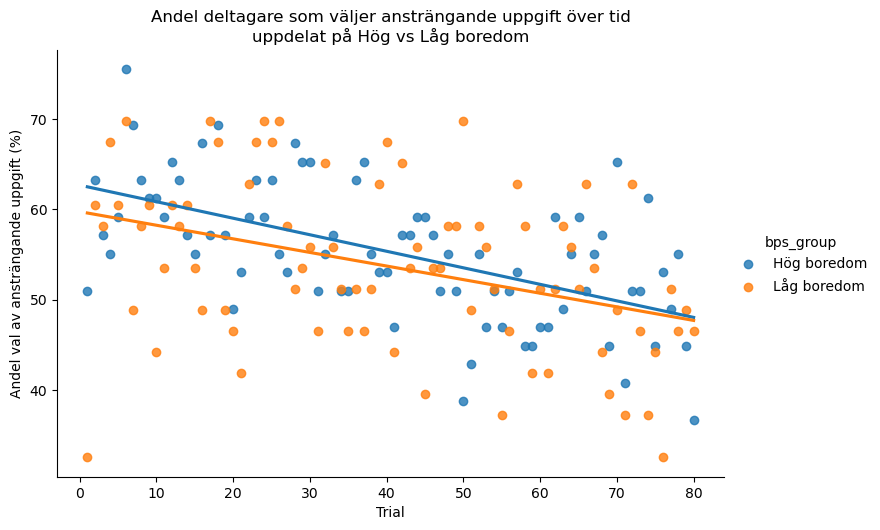

Hög boredom : Riktningskoefficient (k) = -0.00183 , Skärningspunkt (m) = 0.6269
Låg boredom : Riktningskoefficient (k) = -0.00151 , Skärningspunkt (m) = 0.5976


In [64]:
mean_per_trial_group = (df_merged.groupby(["trial", "bps_group"])["task"].mean().reset_index())

mean_per_trial_group["task_percent"] = mean_per_trial_group["task"] * 100

sns.lmplot(
    data=mean_per_trial_group,
    x="trial",
    y="task_percent",
    ci=None,
    hue="bps_group",
    height=5,
    aspect=1.5
)

plt.xlabel("Trial")
plt.ylabel("Andel val av ansträngande uppgift (%)")
plt.title("Andel deltagare som väljer ansträngande uppgift över tid\nuppdelat på Hög vs Låg boredom")
plt.show()

for group, subset in mean_per_trial_group.groupby("bps_group"):
    k, m = np.polyfit(subset["trial"], subset["task"], 1)
    print(group, ": Riktningskoefficient (k) =", k.round(5), ", Skärningspunkt (m) =", m.round(4))


**Figur 3.** Andel deltagare som valde den ansträngande uppgiften över tid (1–80 trials), uppdelat på låg respektive hög boredom-grupp. Linjerna visar linjära trendlinjer för respektive grupp.

Figur 3 visar andelen deltagare som valde den ansträngande uppgiften (”ADD 3”) över tid, uppdelat efter låg respektive hög boredom proneness (BPS). Båda grupperna uppvisar en svagt nedåtgående trend, vilket innebär att deltagarna generellt sett blev något mindre benägna att välja den ansträngande uppgiften ju fler trials som genomfördes. 

Lutningen för hög boredom var -0,00183 och för låg boredom -0,00151. Skillnaden mellan grupperna var därmed 0,00032. Över 80 trials är det alltså endast cirka 2,5 procentenheter skillnad mellan grupperna (0,00032 * 80). Detta tyder på att båda grupperna blev något mindre benägna att välja den ansträngande uppgiften över tid, och att skillnaden mellan grupperna är mycket liten.

Då skillnaden i lutning mellan grupperna är mycket liten, skulle ett statistiskt test troligen inte visa någon signifikant skillnad. Vi valde därför att fokusera på trendernas riktning snarare än p-värden.

# Sammanfattning

Sammanfattningsvis kan vi se att deltagarna gradvis blev mindre benägna att välja den kognitivt krävande uppgiften ju längre experimentet pågick. Resultatet visar även att personer med hög Need for Cognition tenderar att föredra mer kognitivt krävande uppgifter, då de oftare valde ADD 3-uppgiften. Efter cirka 50 trials blev de däremot mindre benägna att välja den ansträngande uppgiften jämfört med de med låg Need for Cognition. Detta kan exempelvis bero på att personer med hög NFC till en början lägger mer energi på att lösa de ansträngande uppgifterna, vilket gör att de snabbare når en punkt av trötthet eller kognitiv utmattning.

När det gäller Boredom Proneness visade resultaten att både deltagare med hög och låg Boredom Pronesess uppvisade en liknande minskning i valet av den ansträngande uppgiften över tid. Skillnaden i lutning mellan grupperna var mycket liten, vilket tyder på att graden av BPS inte hade någon tydlig inveran på deltagarnas benägenhet att välja den kogngitivt krävande uppgiften. 

Vidare forskning skulle kunna fastställa om minskningen främst beror på mental trötthet, minskad motivation eller andra individuella skillnader. 

(utveckla mer eller nåt...?)